In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121

In [2]:
# Định nghĩa thư mục dữ liệu
train_dir = './Train'
val_dir = './Test'

# Tạo ImageDataGenerator cho tập huấn luyện và tập kiểm tra
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Tạo generator cho dữ liệu
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # DenseNet121 yêu cầu kích thước đầu vào 224x224
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Tải mô hình DenseNet121 với trọng số được huấn luyện trước
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Đóng băng các lớp của mô hình cơ sở để không huấn luyện lại
base_model.trainable = False

# Thêm các lớp tùy chỉnh lên trên mô hình DenseNet121
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Thay vì Flatten, dùng GlobalAveragePooling2D
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(train_generator.num_classes, activation='softmax')(x)

# Tạo mô hình hoàn chỉnh
model = Model(inputs=base_model.input, outputs=outputs)

# Biên dịch mô hình
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy * 100:.2f}%")

# Lưu mô hình
model.save('tool_recognition_densenet_model.h5')

Found 2774 images belonging to 6 classes.
Found 1080 images belonging to 6 classes.


D:\DACN_3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6430 - loss: 0.9443

D:\DACN_3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.6446 - loss: 0.9402 - val_accuracy: 0.8824 - val_loss: 0.3866
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.8944 - loss: 0.3015 - val_accuracy: 0.9009 - val_loss: 0.3410
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.9167 - loss: 0.2355 - val_accuracy: 0.8981 - val_loss: 0.3423
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9268 - loss: 0.2137 - val_accuracy: 0.9120 - val_loss: 0.3667
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.9355 - loss: 0.1857 - val_accuracy: 0.9093 - val_loss: 0.3614
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9371 - loss: 0.1827 - val_accuracy: 0.9241 - val_loss: 0.2688
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.9442 - loss: 0.1571 - val_accuracy: 0.9185 - val_loss: 0.3296
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9437 - loss: 0.1456 - val_accuracy: 0.9343 - val_loss: 0.

Độ chính xác trên tập kiểm tra: 95.93%


Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 56, 56, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 56, 56, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 56, 56, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,433,428 (28.36 MB)

 Trainable params: 131,974 (515.52 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

 Optimizer params: 263,950 (1.01 MB)

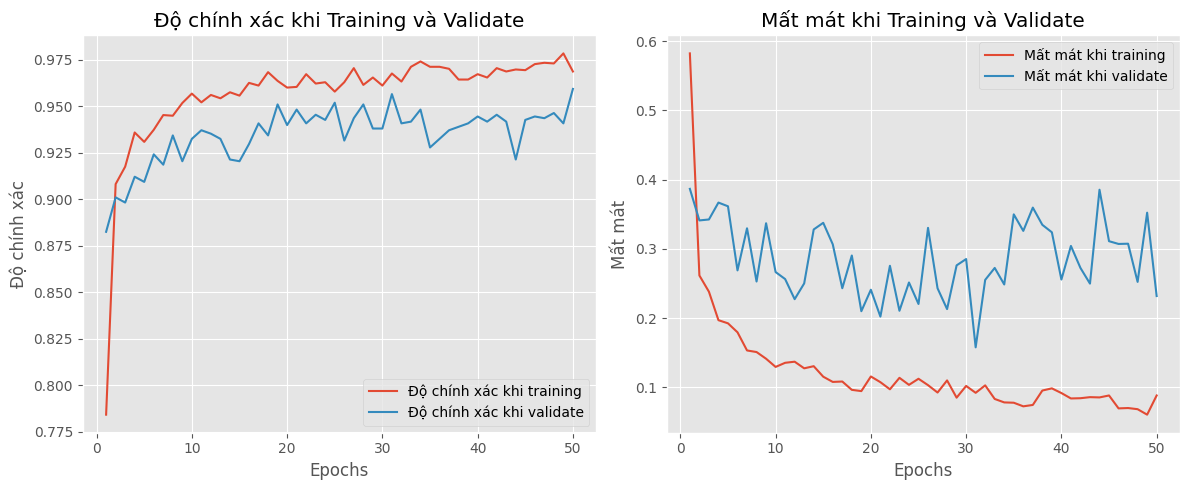

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# In tóm tắt kiến trúc mô hình
print("Model Summary:")
model.summary()

# Trích xuất thông tin từ history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = len(history.history["loss"])
epochs_range = range(1, num_epochs + 1)

# Thiết lập phong cách ggplot
plt.style.use("ggplot")

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))

# Biểu đồ độ chính xác
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Độ chính xác khi training')
plt.plot(epochs_range, val_acc, label='Độ chính xác khi validate')
plt.title('Độ chính xác khi Training và Validate')
plt.xlabel('Epochs')
plt.ylabel('Độ chính xác')
plt.legend()

# Biểu đồ hàm mất mát
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Mất mát khi training')
plt.plot(epochs_range, val_loss, label='Mất mát khi validate')
plt.title('Mất mát khi Training và Validate')
plt.xlabel('Epochs')
plt.ylabel('Mất mát')
plt.legend()

# Đảm bảo bố cục gọn gàng và hiển thị biểu đồ
plt.tight_layout()
plt.show()